# Results of XVNLI

In [10]:
from evaluater import Evaluater
import pandas as pd
import numpy as np

languages = ['ar', 'fr', 'es', 'ru']
# store accuracy for each language
accuracy_dict = {}

# for each language
for lang in languages:
    for shot in [0, 1, 5, 10, 20, 25, 48]:
        df = pd.read_csv(f"result/XVNLI/{lang}/prediction_{shot}_shot.csv", sep=",", header=0)
        predictions = df["prediction"].values
        evaluater = Evaluater("nli", lang)
        accuracy = evaluater.accuracy(predictions)
        accuracy_dict[f"{lang}_{shot}"] = accuracy

# print accuracy in table
print("lang", end="\t")
for shot in [0, 1, 5, 10, 20, 25, 48]:
    print(shot, end="\t")
print()
for lang in languages:
    print(lang, end="\t")
    for shot in [0, 1, 5, 10, 20, 25, 48]:
        print(f"{accuracy_dict[f'{lang}_{shot}']:.4f}", end="\t")
    print()

lang	0	1	5	10	20	25	48	
ar	0.5800	0.5661	0.5670	0.5852	0.6026	0.5922	0.6070	
fr	0.6322	0.6191	0.6139	0.6278	0.6461	0.6365	0.6461	
es	0.6104	0.5896	0.5913	0.5939	0.6261	0.6061	0.6261	
ru	0.6139	0.5957	0.6052	0.6191	0.6304	0.6339	0.6557	


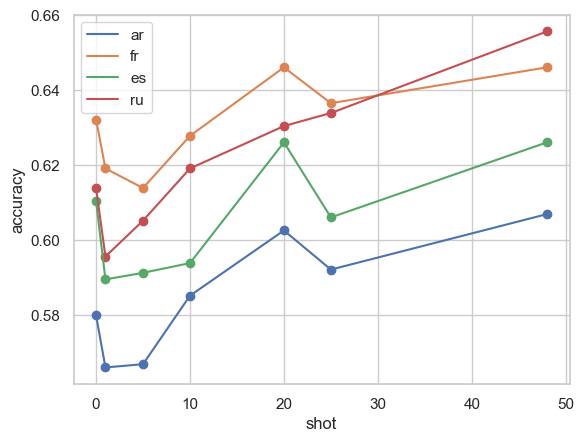

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

for lang in languages:
    x = [0, 1, 5, 10, 20, 25, 48]
    y = [accuracy_dict[f"{lang}_{shot}"] for shot in x]
    plt.plot(x, y, label=lang)
    plt.scatter(x, y)
    

plt.legend()
plt.xlabel("shot")
plt.ylabel("accuracy")
plt.show()

# Results for MaRVL

In [14]:
from evaluater import Evaluater
import pandas as pd
import numpy as np

# print all the frames used
template1 = "<{}> <{}>"
template2 = "Left: {}. Right: {}."
template3 = "There are {} in the left image and {} in the right image."
template4 = "Left: <{}>. Right: <{}>."
template5 = "The left image shows {} while the right image shows {}."

print("Frame0: {} {}")
print("Frame1:", template1)
print("Frame2:", template2)
print("Frame3:", template3)
print("Frame4:", template4)
print("Frame5:", template5)  



languages = ["id", "sw", "ta", "tr", "zh"]
# store accuracy for each language
accuracy_dict = {}

# for each language
for lang in languages:
    for frame in [0, 1, 2, 3, 4, 5]:
        df = pd.read_csv(f"result/MaRVL/{lang}/prediction_frame_{frame}.csv", sep=",", header=0)
        predictions = df["prediction"].values
        evaluater = Evaluater("nlr", lang)
        accuracy = evaluater.accuracy(predictions)
        accuracy_dict[f"{lang}_{frame}"] = accuracy

# print accuracy in table
print("lang", end="\t")
for frame in [0, 1, 2, 3, 4, 5]:
    print(frame, end="\t")
print()
for lang in languages:
    print(lang, end="\t")
    for frame in [0, 1, 2, 3, 4, 5]:
        print(f"{accuracy_dict[f'{lang}_{frame}']:.4f}", end="\t")
    print()


Frame0: {} {}
Frame1: <{}> <{}>
Frame2: Left: {}. Right: {}.
Frame3: There are {} in the left image and {} in the right image.
Frame4: Left: <{}>. Right: <{}>.
Frame5: The left image shows {} while the right image shows {}.
lang	0	1	2	3	4	5	
id	0.5691	0.5638	0.5647	0.5603	0.5647	0.5674	
sw	0.5514	0.5560	0.5478	0.5424	0.5460	0.5352	
ta	0.5692	0.5789	0.5709	0.5612	0.5692	0.5556	
tr	0.5771	0.5831	0.5831	0.5678	0.5831	0.5737	
zh	0.5464	0.5524	0.5573	0.5534	0.5692	0.5553	


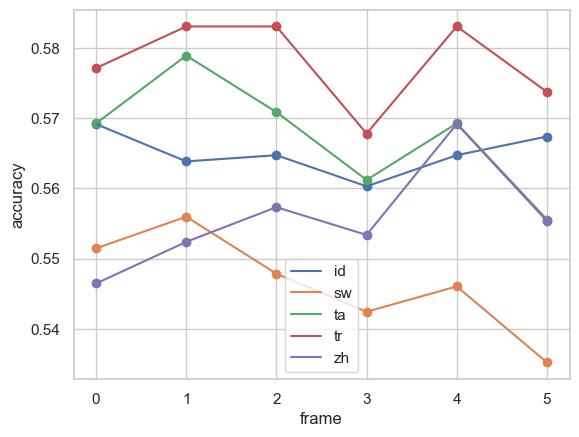

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

for lang in languages:
    x = [0, 1, 2, 3, 4, 5]
    y = [accuracy_dict[f"{lang}_{frame}"] for frame in x]
    plt.plot(x, y, label=lang)
    plt.scatter(x, y)

plt.legend()
plt.xlabel("frame")
plt.ylabel("accuracy")
plt.show()